In [1]:
import sys
import pandas

import numpy

from matplotlib import pyplot
from matplotlib import dates
from matplotlib import ticker

from scipy import stats
from scipy import interpolate
from scipy import optimize

from sklearn import preprocessing

import torch

In [2]:
import warnings
warnings.filterwarnings('ignore')

# data input
[NOAIG](http://www.gein.noa.gr/services/full_catalogue.php)

In [3]:
df = pandas.read_csv('full_catalogue.php', header=None, skiprows=2, sep='\s+', 
    names=['year', 'month', 'day', 'hour', 'minute', 'second', 'latitude', 'longitude', 'depth', 'magnitude']
    )

In [4]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude
0,1964,FEB,24,23,30,25.0,38.9000,23.9000,10,5.3
1,1964,APR,11,16,0,0.0,39.7500,25.2500,10,5.7
2,1964,APR,21,8,14,40.0,38.5000,22.2500,10,4.5
3,1964,APR,24,3,49,58.0,38.0000,21.8000,10,5.0
4,1964,APR,29,4,21,0.0,39.2500,23.7500,10,5.8
...,...,...,...,...,...,...,...,...,...,...
313611,2021,APR,11,19,46,24.0,39.7495,23.4970,16,2.1
313612,2021,APR,11,21,42,29.2,38.1189,23.3313,13,2.1
313613,2021,APR,11,21,59,54.8,37.6053,20.4922,18,2.0
313614,2021,APR,11,22,13,39.7,39.7774,22.0326,6,1.5


## data conversions

In [5]:
df.index.name = 'id'

### datetime

month abbreviations to integers:

In [6]:
import calendar

month_abbr_as_ints = dict((x,y) for (y,x) in enumerate(calendar.month_abbr))
month_abbr_as_ints

{'': 0,
 'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [7]:
df['month'] = df['month'].str.title()

In [8]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude
id,,,,,,,,,,
0,1964,Feb,24,23,30,25.0,38.9000,23.9000,10,5.3
1,1964,Apr,11,16,0,0.0,39.7500,25.2500,10,5.7
2,1964,Apr,21,8,14,40.0,38.5000,22.2500,10,4.5
3,1964,Apr,24,3,49,58.0,38.0000,21.8000,10,5.0
4,1964,Apr,29,4,21,0.0,39.2500,23.7500,10,5.8
...,...,...,...,...,...,...,...,...,...,...
313611,2021,Apr,11,19,46,24.0,39.7495,23.4970,16,2.1
313612,2021,Apr,11,21,42,29.2,38.1189,23.3313,13,2.1
313613,2021,Apr,11,21,59,54.8,37.6053,20.4922,18,2.0


In [9]:
df['month'].replace(month_abbr_as_ints, inplace=True)

In [10]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude
id,,,,,,,,,,
0,1964,2,24,23,30,25.0,38.9000,23.9000,10,5.3
1,1964,4,11,16,0,0.0,39.7500,25.2500,10,5.7
2,1964,4,21,8,14,40.0,38.5000,22.2500,10,4.5
3,1964,4,24,3,49,58.0,38.0000,21.8000,10,5.0
4,1964,4,29,4,21,0.0,39.2500,23.7500,10,5.8
...,...,...,...,...,...,...,...,...,...,...
313611,2021,4,11,19,46,24.0,39.7495,23.4970,16,2.1
313612,2021,4,11,21,42,29.2,38.1189,23.3313,13,2.1
313613,2021,4,11,21,59,54.8,37.6053,20.4922,18,2.0


create datetime strings:

In [11]:
df['datetime'] = (
    df['year'].astype(str) + '-' + 
    df['month'].astype(str) + '-' +
    df['day'].astype(str) + ' ' +
    df['hour'].astype(str) + ':' +
    df['minute'].astype(str) + ':' +
    df['second'].astype(str)
)

In [12]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude,datetime
id,,,,,,,,,,,
0,1964,2,24,23,30,25.0,38.9000,23.9000,10,5.3,1964-2-24 23:30:25.0
1,1964,4,11,16,0,0.0,39.7500,25.2500,10,5.7,1964-4-11 16:0:0.0
2,1964,4,21,8,14,40.0,38.5000,22.2500,10,4.5,1964-4-21 8:14:40.0
3,1964,4,24,3,49,58.0,38.0000,21.8000,10,5.0,1964-4-24 3:49:58.0
4,1964,4,29,4,21,0.0,39.2500,23.7500,10,5.8,1964-4-29 4:21:0.0
...,...,...,...,...,...,...,...,...,...,...,...
313611,2021,4,11,19,46,24.0,39.7495,23.4970,16,2.1,2021-4-11 19:46:24.0
313612,2021,4,11,21,42,29.2,38.1189,23.3313,13,2.1,2021-4-11 21:42:29.2
313613,2021,4,11,21,59,54.8,37.6053,20.4922,18,2.0,2021-4-11 21:59:54.8


drop unnecessary columns:

In [13]:
df.drop(columns = ['year', 'month', 'day', 'hour', 'minute', 'second'], inplace = True)

In [14]:
df

,latitude,longitude,depth,magnitude,datetime
id,,,,,
0,38.9000,23.9000,10,5.3,1964-2-24 23:30:25.0
1,39.7500,25.2500,10,5.7,1964-4-11 16:0:0.0
2,38.5000,22.2500,10,4.5,1964-4-21 8:14:40.0
3,38.0000,21.8000,10,5.0,1964-4-24 3:49:58.0
4,39.2500,23.7500,10,5.8,1964-4-29 4:21:0.0
...,...,...,...,...,...
313611,39.7495,23.4970,16,2.1,2021-4-11 19:46:24.0
313612,38.1189,23.3313,13,2.1,2021-4-11 21:42:29.2
313613,37.6053,20.4922,18,2.0,2021-4-11 21:59:54.8


In [15]:
df.dtypes

latitude     float64
longitude    float64
depth          int64
magnitude    float64
datetime      object
dtype: object

datetime strings to datetime64 objects:

In [16]:
df['datetime'] = pandas.to_datetime(df['datetime'])

In [17]:
df

,latitude,longitude,depth,magnitude,datetime
id,,,,,
0,38.9000,23.9000,10,5.3,1964-02-24 23:30:25.000
1,39.7500,25.2500,10,5.7,1964-04-11 16:00:00.000
2,38.5000,22.2500,10,4.5,1964-04-21 08:14:40.000
3,38.0000,21.8000,10,5.0,1964-04-24 03:49:58.000
4,39.2500,23.7500,10,5.8,1964-04-29 04:21:00.000
...,...,...,...,...,...
313611,39.7495,23.4970,16,2.1,2021-04-11 19:46:24.000
313612,38.1189,23.3313,13,2.1,2021-04-11 21:42:29.200
313613,37.6053,20.4922,18,2.0,2021-04-11 21:59:54.800


In [18]:
df.dtypes

latitude            float64
longitude           float64
depth                 int64
magnitude           float64
datetime     datetime64[ns]
dtype: object

### index
datetime becomes dataframe's new index:

In [19]:
df = df.reset_index().set_index('datetime')

In [20]:
df

,id,latitude,longitude,depth,magnitude
datetime,,,,,
1964-02-24 23:30:25.000,0,38.9000,23.9000,10,5.3
1964-04-11 16:00:00.000,1,39.7500,25.2500,10,5.7
1964-04-21 08:14:40.000,2,38.5000,22.2500,10,4.5
1964-04-24 03:49:58.000,3,38.0000,21.8000,10,5.0
1964-04-29 04:21:00.000,4,39.2500,23.7500,10,5.8
...,...,...,...,...,...
2021-04-11 19:46:24.000,313611,39.7495,23.4970,16,2.1
2021-04-11 21:42:29.200,313612,38.1189,23.3313,13,2.1
2021-04-11 21:59:54.800,313613,37.6053,20.4922,18,2.0


### cumulative events

In [21]:
df['event'] = 1
df['event'] = df['event'].cumsum()

In [22]:
df

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1964-02-24 23:30:25.000,0,38.9000,23.9000,10,5.3,1
1964-04-11 16:00:00.000,1,39.7500,25.2500,10,5.7,2
1964-04-21 08:14:40.000,2,38.5000,22.2500,10,4.5,3
1964-04-24 03:49:58.000,3,38.0000,21.8000,10,5.0,4
1964-04-29 04:21:00.000,4,39.2500,23.7500,10,5.8,5
...,...,...,...,...,...,...
2021-04-11 19:46:24.000,313611,39.7495,23.4970,16,2.1,313612
2021-04-11 21:42:29.200,313612,38.1189,23.3313,13,2.1,313613
2021-04-11 21:59:54.800,313613,37.6053,20.4922,18,2.0,313614


## data range

*As data source on seismicity, we used the Greek SI-NOA (Seismolo-gical Institute, National Observatory of Athens) catalog for 15 years from 1982 to 1996. The space window 20–25°E and 36–40°N was applied, and, because some 98% of earthquakes wereof shallow depth of less than 50 km, no lower limit on hypocenter depths was set on. To use a surface wave magnitude (M_s) as usually defined, we added 0.5 to the local magnitudes (M_L) reported by SI-NOA (Geller, 1996b).*

In [23]:
# ...used the Greek SI-NOA (Seismolo-gical Institute, National Observatory of Athens) catalog for 15 years from 1982 to 1996.
df_papr = df['1982-01-01 00:00:00':'1996-12-31 23:59:59'].copy()

In [24]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 00:44:01.000,9999,38.80,25.10,10,3.4,10000
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.3,10001
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.0,10002
1982-01-02 19:02:12.000,10002,38.80,25.10,10,3.5,10003
1982-01-03 19:35:11.000,10003,38.80,24.90,10,3.6,10004
...,...,...,...,...,...,...
1996-12-30 13:17:39.500,28320,38.21,26.12,10,3.5,28321
1996-12-30 16:50:20.700,28321,38.19,22.56,10,2.5,28322
1996-12-30 17:44:48.300,28322,37.07,20.64,10,2.9,28323


In [25]:
# The space window 20–25°E and 36–40°N was applied...
filtr = (df_papr['longitude'] >= 20.0) & (df['longitude'] <= 25.0 )
df_papr = df_papr.loc[filtr]
filtr = (df_papr['latitude'] >= 36.0) & (df['latitude'] <= 40.0 )
df_papr = df_papr.loc[filtr]

In [26]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.3,10001
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.0,10002
1982-01-03 19:35:11.000,10003,38.80,24.90,10,3.6,10004
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.3,10005
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.4,10006
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.2,28314
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.0,28319
1996-12-30 16:50:20.700,28321,38.19,22.56,10,2.5,28322


In [27]:
# ...because some 98% of earthquakes wereof shallow depth of less than 50 km, no lower limit on hypocenter depths was set on.
(df_papr['id'].loc[df['depth'] < 50].count()/df_papr['id'].count())*100

98.09187279151944

In [28]:
# To use a surface wave magnitude (M_s) as usually defined, we added 0.5 to the local magnitudes (M_L) reported by SI-NOA.
df_papr['magnitude'] = df_papr['magnitude'].apply(lambda x: x + 0.5)

In [29]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,10001
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,10002
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,10004
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,10005
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,10006
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,28314
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,28319
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,28322


In [30]:
df_papr['event'] = 1
df_papr['event'] = df_papr['event'].cumsum()

In [31]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,3
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,4
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,5
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,11316
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,11317
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


# paper reproduction

## figure 3

*Variation of the monthly number of all reported earthquakes with known magnitudes in the Peloponnesos–Aegean region for the interval of 15 years of 1982–1996. <br> Dashed line: regression line fitted to data, its slope: 1.8±0.7.*

In [32]:
assert df_papr['id'].count() == df_papr['event'].max()

number of events per year:

In [33]:
df_papr_fig3 = df_papr['id'].resample('M').count()

plot creation:

In [34]:
df_papr_fig3

datetime
1982-01-31    182
1982-02-28     75
1982-03-31     59
1982-04-30     98
1982-05-31     81
             ... 
1996-08-31    140
1996-09-30     74
1996-10-31    133
1996-11-30     71
1996-12-31     97
Freq: M, Name: id, Length: 180, dtype: int64

use ‘linregress’ function from SciPy statistics package for the linear regression

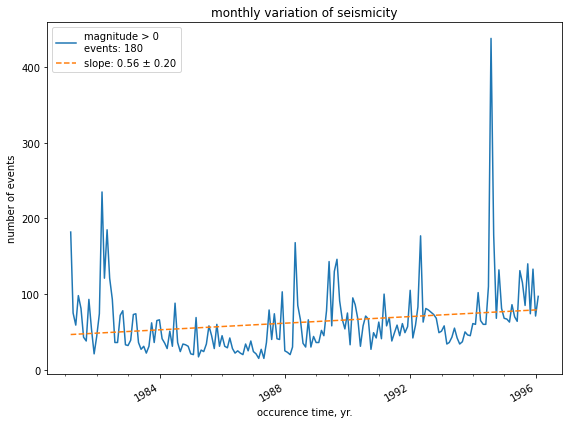

In [35]:
(fig3, ax3) = pyplot.subplots(figsize=(8, 6))

x_fig3 = df_papr_fig3.index
y_fig3 = df_papr_fig3

lctr_major_fig3 = dates.MonthLocator(interval=48)
lctr_minor_fig3 = dates.MonthLocator(interval=12)

# date_major_formatter_fig3 = dates.DateFormatter('%Y')
# date_minor_formatter_fig3 = dates.DateFormatter('%M')
fmtr_major_fig3 = dates.DateFormatter('%Y')

ax3.plot_date(x_fig3, y_fig3, linestyle='solid', markersize=0)

ax3.set_title('monthly variation of seismicity')
ax3.set_xlabel('occurence time, yr.')
ax3.set_ylabel('number of events')

ax3.xaxis.set_major_locator(lctr_major_fig3)
ax3.xaxis.set_minor_locator(lctr_minor_fig3)

# ax3.xaxis.set_major_formatter(date_major_formatter_fig3)
# ax3.xaxis.set_minor_formatter(date_minor_formatter_fig3)
ax3.xaxis.set_major_formatter(fmtr_major_fig3)

fig3.set_tight_layout(True)
fig3.autofmt_xdate()

# ax3.tick_params(which='minor', color='r')
# ax3.set_xlim(
#     pandas.to_datetime('1981-01-01 00:00:00'), 
#     pandas.to_datetime('1999-12-31 00:00:00')
#     )

ax3.grid(False)

# SciPy statistics *linregress()* for linear regression

y_fig3_nparray = numpy.array(y_fig3.values, dtype=float)
x_fig3_nparray = numpy.array(x_fig3.values, dtype=float)

(slope_fig3, intercept_fig3, r_value_fig3, p_value_fig3, std_error_fig3) = stats.linregress(x_fig3_nparray, y_fig3_nparray)

xf_fig3 = numpy.linspace(min(x_fig3_nparray), max(x_fig3_nparray), 1000)
xf_fig3_copy = xf_fig3.copy()
xf_fig3_copy = pandas.to_datetime(xf_fig3_copy)
yf_fig3 = (slope_fig3 * xf_fig3) + intercept_fig3

ax3.plot(xf_fig3_copy, yf_fig3, linestyle='--')

# Call numpy.linalg.norm(arr) to find the normal form of an array arr. 
# Divide an array by its norm to normalize the array.

norm_fig3 = numpy.linalg.norm(x_fig3_nparray)
x_fig3_nparray = x_fig3_nparray/norm_fig3
norm_fig3 = numpy.linalg.norm(y_fig3_nparray)
y_fig3_nparray = y_fig3_nparray/norm_fig3

(slope_fig3, intercept_fig3, r_value_fig3, p_value_fig3, std_error_fig3) = stats.linregress(x_fig3_nparray, y_fig3_nparray)

ax3.legend(('magnitude > 0\nevents: {0}'.format(df_papr_fig3.count()),'slope: {0:04.2F} ± {1:04.2F}'.format(slope_fig3, std_error_fig3),))

In [36]:
(slope_fig3, intercept_fig3, r_value_fig3, p_value_fig3, std_error_fig3)

(0.5610941446641485,
 0.019153424186920252,
 0.2045466932863338,
 0.005880947223241362,
 0.2012576688763378)

## figure 5

*Variations of the cumulative number of events versus time, in six magnitude bands in the Peloponnesos-Aegean area. <br> Dots indicate occurrences of large (M≥6.0) earthquakes.*

### dataframe slicing

In [37]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,3
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,4
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,5
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,11316
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,11317
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


In [38]:
df_papr.dtypes

id             int64
latitude     float64
longitude    float64
depth          int64
magnitude    float64
event          int64
dtype: object

0.0 < magnitude ≤ 3.6

In [39]:
filtr = (df_papr['magnitude'] > 0) & (df_papr['magnitude'] <= 3.4)
df_papr_fig5a = df_papr[filtr].copy()

In [40]:
df_papr_fig5a

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-12 08:32:41.000,10039,38.40,23.20,10,3.4,33
1982-01-22 09:12:01.000,10166,38.60,24.90,10,3.4,146
1982-01-27 04:17:07.000,10189,38.60,24.80,10,3.4,167
1982-01-27 19:22:57.000,10192,38.20,23.10,10,3.4,170
1982-01-31 02:44:32.000,10203,38.60,24.40,10,3.4,178
...,...,...,...,...,...,...
1996-12-24 11:00:26.500,28293,38.08,23.14,14,2.8,11307
1996-12-24 19:50:44.400,28294,38.63,22.07,8,3.2,11308
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


In [41]:
df_papr_fig5a['event'] = 1
df_papr_fig5a['event'] = df_papr_fig5a['event'].cumsum()

In [42]:
df_papr_fig5a

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-12 08:32:41.000,10039,38.40,23.20,10,3.4,1
1982-01-22 09:12:01.000,10166,38.60,24.90,10,3.4,2
1982-01-27 04:17:07.000,10189,38.60,24.80,10,3.4,3
1982-01-27 19:22:57.000,10192,38.20,23.10,10,3.4,4
1982-01-31 02:44:32.000,10203,38.60,24.40,10,3.4,5
...,...,...,...,...,...,...
1996-12-24 11:00:26.500,28293,38.08,23.14,14,2.8,3348
1996-12-24 19:50:44.400,28294,38.63,22.07,8,3.2,3349
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,3350


3.5 < magnitude ≤ 3.9

In [43]:
filtr = (df_papr['magnitude'] >= 3.5) & (df_papr['magnitude'] <= 3.9)
df_papr_fig5b = df_papr[filtr].copy()

In [44]:
df_papr_fig5b['event'] = 1
df_papr_fig5b['event'] = df_papr_fig5b['event'].cumsum()

In [45]:
df_papr_fig5b

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,3
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,4
1982-01-04 04:01:26.000,10006,38.90,25.00,10,3.7,5
...,...,...,...,...,...,...
1996-12-26 21:23:55.700,28303,38.76,21.70,1,3.8,5180
1996-12-27 02:29:06.800,28304,39.21,22.04,1,3.9,5181
1996-12-28 11:49:31.200,28308,38.73,20.68,1,3.7,5182


4.0 < magnitude ≤ 4.4

In [46]:
filtr = (df_papr['magnitude'] >= 4.0) & (df_papr['magnitude'] <= 4.4)
df_papr_fig5c = df_papr[filtr].copy()

In [47]:
df_papr_fig5c['event'] = 1
df_papr_fig5c['event'] = df_papr_fig5c['event'].cumsum()

In [48]:
df_papr_fig5c

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,1
1982-01-04 09:56:37.000,10008,38.90,24.80,10,4.2,2
1982-01-05 08:29:27.000,10014,38.90,24.90,10,4.2,3
1982-01-06 00:30:51.000,10016,38.90,24.80,10,4.0,4
1982-01-06 16:44:53.000,10020,38.80,20.80,10,4.0,5
...,...,...,...,...,...,...
1996-12-17 11:49:00.700,28251,36.80,24.18,24,4.1,2187
1996-12-17 13:24:45.600,28252,39.00,22.21,84,4.0,2188
1996-12-20 02:14:47.200,28267,36.88,22.75,13,4.2,2189


4.5 < magnitude ≤ 4.9

In [49]:
filtr = (df_papr['magnitude'] >= 4.5) & (df_papr['magnitude'] <= 4.9)
df_papr_fig5d = df_papr[filtr].copy()

In [50]:
df_papr_fig5d['event'] = 1
df_papr_fig5d['event'] = df_papr_fig5d['event'].cumsum()

In [51]:
df_papr_fig5d

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-05 00:21:10.000,10012,38.80,24.90,10,4.6,1
1982-01-05 00:30:33.000,10013,38.90,24.90,10,4.9,2
1982-01-08 22:20:18.000,10028,38.90,24.70,10,4.6,3
1982-01-09 07:59:41.000,10029,38.50,21.90,10,4.5,4
1982-01-09 08:16:31.000,10030,38.50,21.90,10,4.7,5
...,...,...,...,...,...,...
1996-11-22 21:05:47.200,28100,40.00,20.80,1,4.5,452
1996-12-03 18:05:10.900,28160,39.88,20.22,8,4.9,453
1996-12-13 16:52:34.600,28202,37.02,23.76,2,4.5,454


magnitude ≥ 5.0

In [52]:
filtr = (df_papr['magnitude'] >= 5.0)
df_papr_fig5e = df_papr[filtr].copy()

In [53]:
df_papr_fig5e['event'] = 1
df_papr_fig5e['event'] = df_papr_fig5e['event'].cumsum()

In [54]:
df_papr_fig5e

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-18 19:27:23.000,10059,39.90,24.50,10,6.9,1
1982-01-18 19:31:14.000,10060,39.80,24.20,10,5.7,2
1982-01-18 20:00:04.000,10066,39.70,24.30,10,5.3,3
1982-01-18 20:00:52.000,10067,39.80,24.30,10,5.4,4
1982-01-19 12:18:15.000,10119,39.90,24.40,10,5.3,5
...,...,...,...,...,...,...
1995-10-01 06:22:39.900,25264,36.88,21.40,30,5.1,133
1996-06-06 16:25:35.800,26667,37.55,21.11,2,5.4,134
1996-10-09 09:46:33.700,27841,36.78,21.46,33,5.2,135


all data

In [55]:
df_papr_fig5f = df_papr.copy()
df_papr_fig5f

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,3
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,4
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,5
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,11316
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,11317
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


large earthquakes (magnitude ≥ 6.0)

In [56]:
filtr = (df_papr_fig5f['magnitude'] >= 6.0)
df_papr_fig5L = df_papr[filtr].copy()

### plot creation

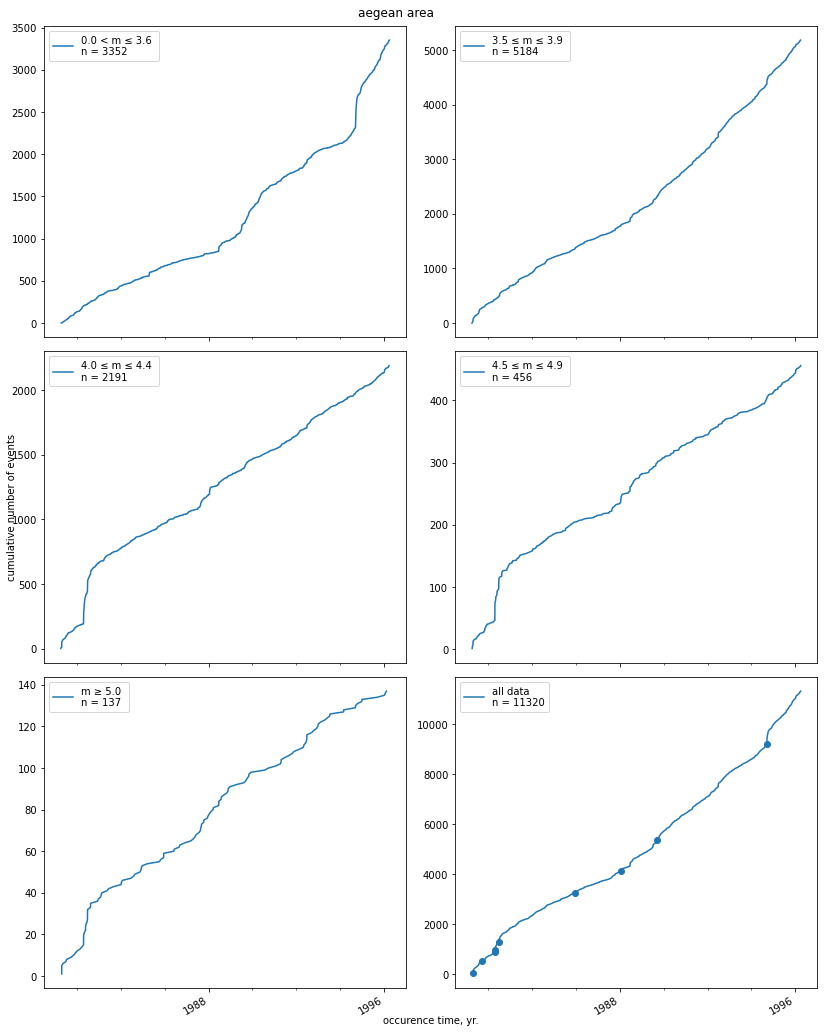

In [57]:
(fig5, ax5) = pyplot.subplots(nrows=3, ncols=2, sharex=True, figsize=(12, 15))

x_fig5a = df_papr_fig5a.index
y_fig5a = df_papr_fig5a['event']

x_fig5b = df_papr_fig5b.index
y_fig5b = df_papr_fig5b['event']

x_fig5c = df_papr_fig5c.index
y_fig5c = df_papr_fig5c['event']

x_fig5d = df_papr_fig5d.index
y_fig5d = df_papr_fig5d['event']

x_fig5e = df_papr_fig5e.index
y_fig5e = df_papr_fig5e['event']

x_fig5f = df_papr_fig5f.index
y_fig5f = df_papr_fig5f['event']

ax5[0][0].plot(x_fig5a, y_fig5a, linestyle='solid', markersize=0)
ax5[0][1].plot(x_fig5b, y_fig5b, linestyle='solid', markersize=0)
ax5[1][0].plot(x_fig5c, y_fig5c, linestyle='solid', markersize=0)
ax5[1][1].plot(x_fig5d, y_fig5d, linestyle='solid', markersize=0)
ax5[2][0].plot(x_fig5e, y_fig5e, linestyle='solid', markersize=0)
ax5[2][1].plot(x_fig5f, y_fig5f, linestyle='solid', markersize=0)

ax5[2][1].scatter(df_papr_fig5L.index, df_papr_fig5L['event'])

lctr_major_fig5 = dates.MonthLocator(interval=96)
lctr_minor_fig5 = dates.MonthLocator(interval=24)

for i in range(0,3):
    for j in range(0,2):
        ax5[i][j].xaxis.set_major_locator(lctr_major_fig5)
        ax5[i][j].xaxis.set_minor_locator(lctr_minor_fig5)

fmtr_major_fig5 = dates.DateFormatter('%Y')

for i in range(0,3):
    for j in range(0,2):
        ax5[i][j].xaxis.set_major_formatter(fmtr_major_fig5)

fig5.suptitle('aegean area')

fig5.add_subplot(111, frame_on=False)
pyplot.tick_params(labelcolor="none", bottom=False, left=False)
pyplot.xlabel("occurence time, yr.")
pyplot.ylabel("cumulative number of events")

ax5[0][0].legend(('0.0 < m ≤ 3.6 \nn = {0}'.format(y_fig5a.max()),), loc="upper left")
ax5[0][1].legend(('3.5 ≤ m ≤ 3.9 \nn = {0}'.format(y_fig5b.max()),), loc="upper left")
ax5[1][0].legend(('4.0 ≤ m ≤ 4.4 \nn = {0}'.format(y_fig5c.max()),), loc="upper left")
ax5[1][1].legend(('4.5 ≤ m ≤ 4.9 \nn = {0}'.format(y_fig5d.max()),), loc="upper left")
ax5[2][0].legend(('m ≥ 5.0 \nn = {0}'.format(y_fig5e.max()),), loc="upper left")
ax5[2][1].legend(('all data \nn = {0}'.format(y_fig5f.max()),), loc="upper left")

fig5.set_tight_layout(True)
fig5.autofmt_xdate()


## figure 7

*Magnitude signature plot (comparison of seismicity rates within two time intervals as a function of magnitudebands) for the considered Pelopponesos–Aegean data set. The plot shows variations characteristic of a detection increase: negative z-values throughout the magnitude signature, lack of change (z~0) in the data sets with larger events(on the right side of the plot) at M≥3.5, strongest change on the left side at magnitudes smaller than 3.5*

### magnitude band slicing

In [58]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,3
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,4
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,5
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,11316
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,11317
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


*Comparison of seismic rates here is made for all events within two time intervals from October 1988 to June 1990 and June 1990 to June 1995 between three large (M≥6.0) earthquakes. The magnitude signature plot in this case shows signs of a detection increase, which, however, ceases from a cutoff magnitude of 3.5.*

In [59]:
df_papr.dtypes

id             int64
latitude     float64
longitude    float64
depth          int64
magnitude    float64
event          int64
dtype: object

In [60]:
df_papr.loc[df_papr['magnitude'] >= 6.0]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-18 19:27:23.000,10059,39.90,24.50,10,6.9,46
1982-06-22 03:04:26.000,10683,37.10,21.20,10,6.2,530
1983-01-17 12:41:30.900,11187,37.97,20.25,9,6.7,886
1983-01-19 00:02:15.500,11271,38.05,20.41,6,6.0,966
1983-03-23 23:51:07.600,11631,38.19,20.40,10,6.2,1285
1986-09-13 17:24:33.800,14722,37.10,22.19,1,6.0,3255
1988-10-16 12:34:05.400,15960,37.90,20.96,4,6.0,4113
1990-06-16 02:16:20.400,17800,39.13,20.38,38,6.0,5362
1995-06-15 00:15:51.000,24206,38.37,22.15,26,6.1,9194


In [61]:
# all events within two time intervals from October 1988 to June 1990 and June 1990 to June 1995 
# between three large (M≥6.0) earthquakes

fltr = [None for i in range(0,2)]

#   fltr[i]
#
#       i = 0: 10/1988_M6.0 (id: 15900) incl - 06/1990_M6.0 (id: 17800) excl
#       i = 1: 06/1990_M6.0 (id: 17800) incl - 06/1995_M6.1 (id: 24206) excl

fltr[0] = (df_papr['id'] >= 15960) & (df_papr['id'] < 17800)
fltr[1] = (df_papr['id'] >= 17800) & (df_papr['id'] < 24206)

In [62]:
df_interval6 = [None for i in range(0,2)]

#   df_interval6[i]
#
#       i = 0: 10/1988_M6.0 (id: 15900) incl - 06/1990_M6.0 (id: 17800) excl
#       i = 1: 06/1990_M6.0 (id: 15900) incl - 06/1995_M6.1 (id: 17800) excl

for i in range(0,2):
    df_interval6[i] = df_papr[fltr[i]].copy()

October 1988 - June 1990 <br> between earthquakes OF magnitude ≥ 6

In [63]:
df_interval6[0]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1988-10-16 12:34:05.400,15960,37.90,20.96,4,6.0,4113
1988-10-16 12:42:03.200,15961,37.87,20.94,4,4.3,4114
1988-10-16 12:43:32.700,15962,37.80,20.67,10,4.4,4115
1988-10-16 12:44:33.900,15963,38.16,20.99,10,4.7,4116
1988-10-16 13:26:28.000,15964,37.57,20.48,18,4.3,4117
...,...,...,...,...,...,...
1990-06-14 22:36:19.800,17794,36.58,21.45,1,4.0,5357
1990-06-14 23:44:59.300,17795,39.13,20.80,1,4.2,5358
1990-06-15 18:32:50.700,17797,38.64,20.58,1,3.5,5359


June 1990 - June 1995 <br> earthquakes OF  magnitude ≥ 6

In [64]:
df_interval6[1]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1990-06-16 02:16:20.400,17800,39.13,20.38,38,6.0,5362
1990-06-16 02:44:08.900,17801,39.21,20.56,2,4.2,5363
1990-06-16 03:32:14.800,17802,39.22,20.51,7,3.8,5364
1990-06-16 09:30:49.000,17803,36.08,22.45,35,3.6,5365
1990-06-16 10:50:05.200,17804,38.26,22.53,33,3.5,5366
...,...,...,...,...,...,...
1995-06-12 20:27:07.200,24193,38.21,22.22,39,3.4,9189
1995-06-13 02:48:39.800,24197,38.29,22.47,10,3.1,9190
1995-06-14 11:08:41.600,24203,38.04,21.54,28,3.0,9191


FOR EACH time interval <br> CREATE magnitude filters:

In [65]:
fltr = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]

#   fltr[i][j][k]
#   
#       i = 0:  October 1988 - June 1990    
#       i = 1:  June 1990 - June 1995
#
#           j = 0: below
#
#               k = 0:  magnitude < 2.5
#               k = 1:  magnitude < 3.0
#               k = 2:  magnitude < 3.5
#               k = 3:  magnitude < 4.0
#               k = 4:  magnitude < 4.5
#               k = 5:  magnitude < 5.0
#               k = 6:  magnitude < 5.5
#               k = 7:  magnitude < 6.0 
#
#           j = 1: above
#
#               k = 0:  2.5 <= magnitude
#               k = 1:  3.0 <= magnitude
#               k = 2:  3.5 <= magnitude
#               k = 3:  4.0 <= magnitude
#               k = 4:  4.5 <= magnitude
#               k = 5:  5.0 <= magnitude
#               k = 6:  5.5 <= magnitude
#               k = 7:  6.0 <= magnitude

for i in range(0,2):
    for j in range(0,2):
        for k in range(0,8):
            if (j == 0):
                fltr[i][j][k] = df_interval6[i]['magnitude'] < (k * 0.5) + 2.5
            if (j == 1):
                fltr[i][j][k] = df_interval6[i]['magnitude'] >= (k * 0.5) + 2.5

FOR EACH time interval <br> CREATE magnitude bands:

In [66]:
df_papr_fig7 = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]

#   df_papr_fig7[i][j][k]    
# 
#       i = 0:  October 1988 - June 1990    
#       i = 1:  June 1990 - June 1995
#
#           j = 0: below
#
#               k = 0:  magnitude < 2.5
#               k = 1:  magnitude < 3.0
#               k = 2:  magnitude < 3.5
#               k = 3:  magnitude < 4.0
#               k = 4:  magnitude < 4.5
#               k = 5:  magnitude < 5.0
#               k = 6:  magnitude < 5.5
#               k = 7:  magnitude < 6.0 
#
#           j = 1: above
#
#               k = 0:  2.5 <= magnitude
#               k = 1:  3.0 <= magnitude
#               k = 2:  3.5 <= magnitude
#               k = 3:  4.0 <= magnitude
#               k = 4:  4.5 <= magnitude
#               k = 5:  5.0 <= magnitude
#               k = 6:  5.5 <= magnitude
#               k = 7:  6.0 <= magnitude

for i in range(0,2):
    for j in range(0,2):
        for k in range(0,8):
            df_papr_fig7[i][j][k] = df_interval6[i].loc[fltr[i][j][k]].copy()

### seismicity rates

In [67]:
df_papr_fig7[0][0][6]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1988-10-16 12:42:03.200,15961,37.87,20.94,4,4.3,4114
1988-10-16 12:43:32.700,15962,37.80,20.67,10,4.4,4115
1988-10-16 12:44:33.900,15963,38.16,20.99,10,4.7,4116
1988-10-16 13:26:28.000,15964,37.57,20.48,18,4.3,4117
1988-10-16 13:30:27.400,15965,38.10,20.83,15,3.9,4118
...,...,...,...,...,...,...
1990-06-14 22:36:19.800,17794,36.58,21.45,1,4.0,5357
1990-06-14 23:44:59.300,17795,39.13,20.80,1,4.2,5358
1990-06-15 18:32:50.700,17797,38.64,20.58,1,3.5,5359


In [68]:
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,8):
            df_papr_fig7[i][j][k]['event'] = 1
            df_papr_fig7[i][j][k]['event'] = df_papr_fig7[i][j][k]['event'].cumsum()

*Seismicity rate variations can be well illustrated by the cumulative number curves. <br> The diagram clearly demonstrates not only variations of the seis-micity rate with time, <br> but also the dependence of the rate changes on the size of the events considered.* 


*...the rate of occurrence of events... <br> ...numerical values of changes of the slope of theseismic rate curves...*

In [69]:
#   df_papr_fig7[i][j][k]    
#   
#       i = 0:  October 1988 - June 1990    
#       i = 1:  June 1990 - June 1995
#
#           j = 0: below
#
#               k = 0:  magnitude < 2.5
#               k = 1:  magnitude < 3.0
#               k = 2:  magnitude < 3.5
#               k = 3:  magnitude < 4.0
#               k = 4:  magnitude < 4.5
#               k = 5:  magnitude < 5.0
#               k = 6:  magnitude < 5.5
#               k = 7:  magnitude < 6.0 
#
#           j = 1: above
#
#               k = 0:  2.5 <= magnitude
#               k = 1:  3.0 <= magnitude
#               k = 2:  3.5 <= magnitude
#               k = 3:  4.0 <= magnitude
#               k = 4:  4.5 <= magnitude
#               k = 5:  5.0 <= magnitude
#               k = 6:  5.5 <= magnitude
#               k = 7:  6.0 <= magnitude

df_papr_fig7[0][0][6]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1988-10-16 12:42:03.200,15961,37.87,20.94,4,4.3,1
1988-10-16 12:43:32.700,15962,37.80,20.67,10,4.4,2
1988-10-16 12:44:33.900,15963,38.16,20.99,10,4.7,3
1988-10-16 13:26:28.000,15964,37.57,20.48,18,4.3,4
1988-10-16 13:30:27.400,15965,38.10,20.83,15,3.9,5
...,...,...,...,...,...,...
1990-06-14 22:36:19.800,17794,36.58,21.45,1,4.0,1241
1990-06-14 23:44:59.300,17795,39.13,20.80,1,4.2,1242
1990-06-15 18:32:50.700,17797,38.64,20.58,1,3.5,1243


calculating slopes

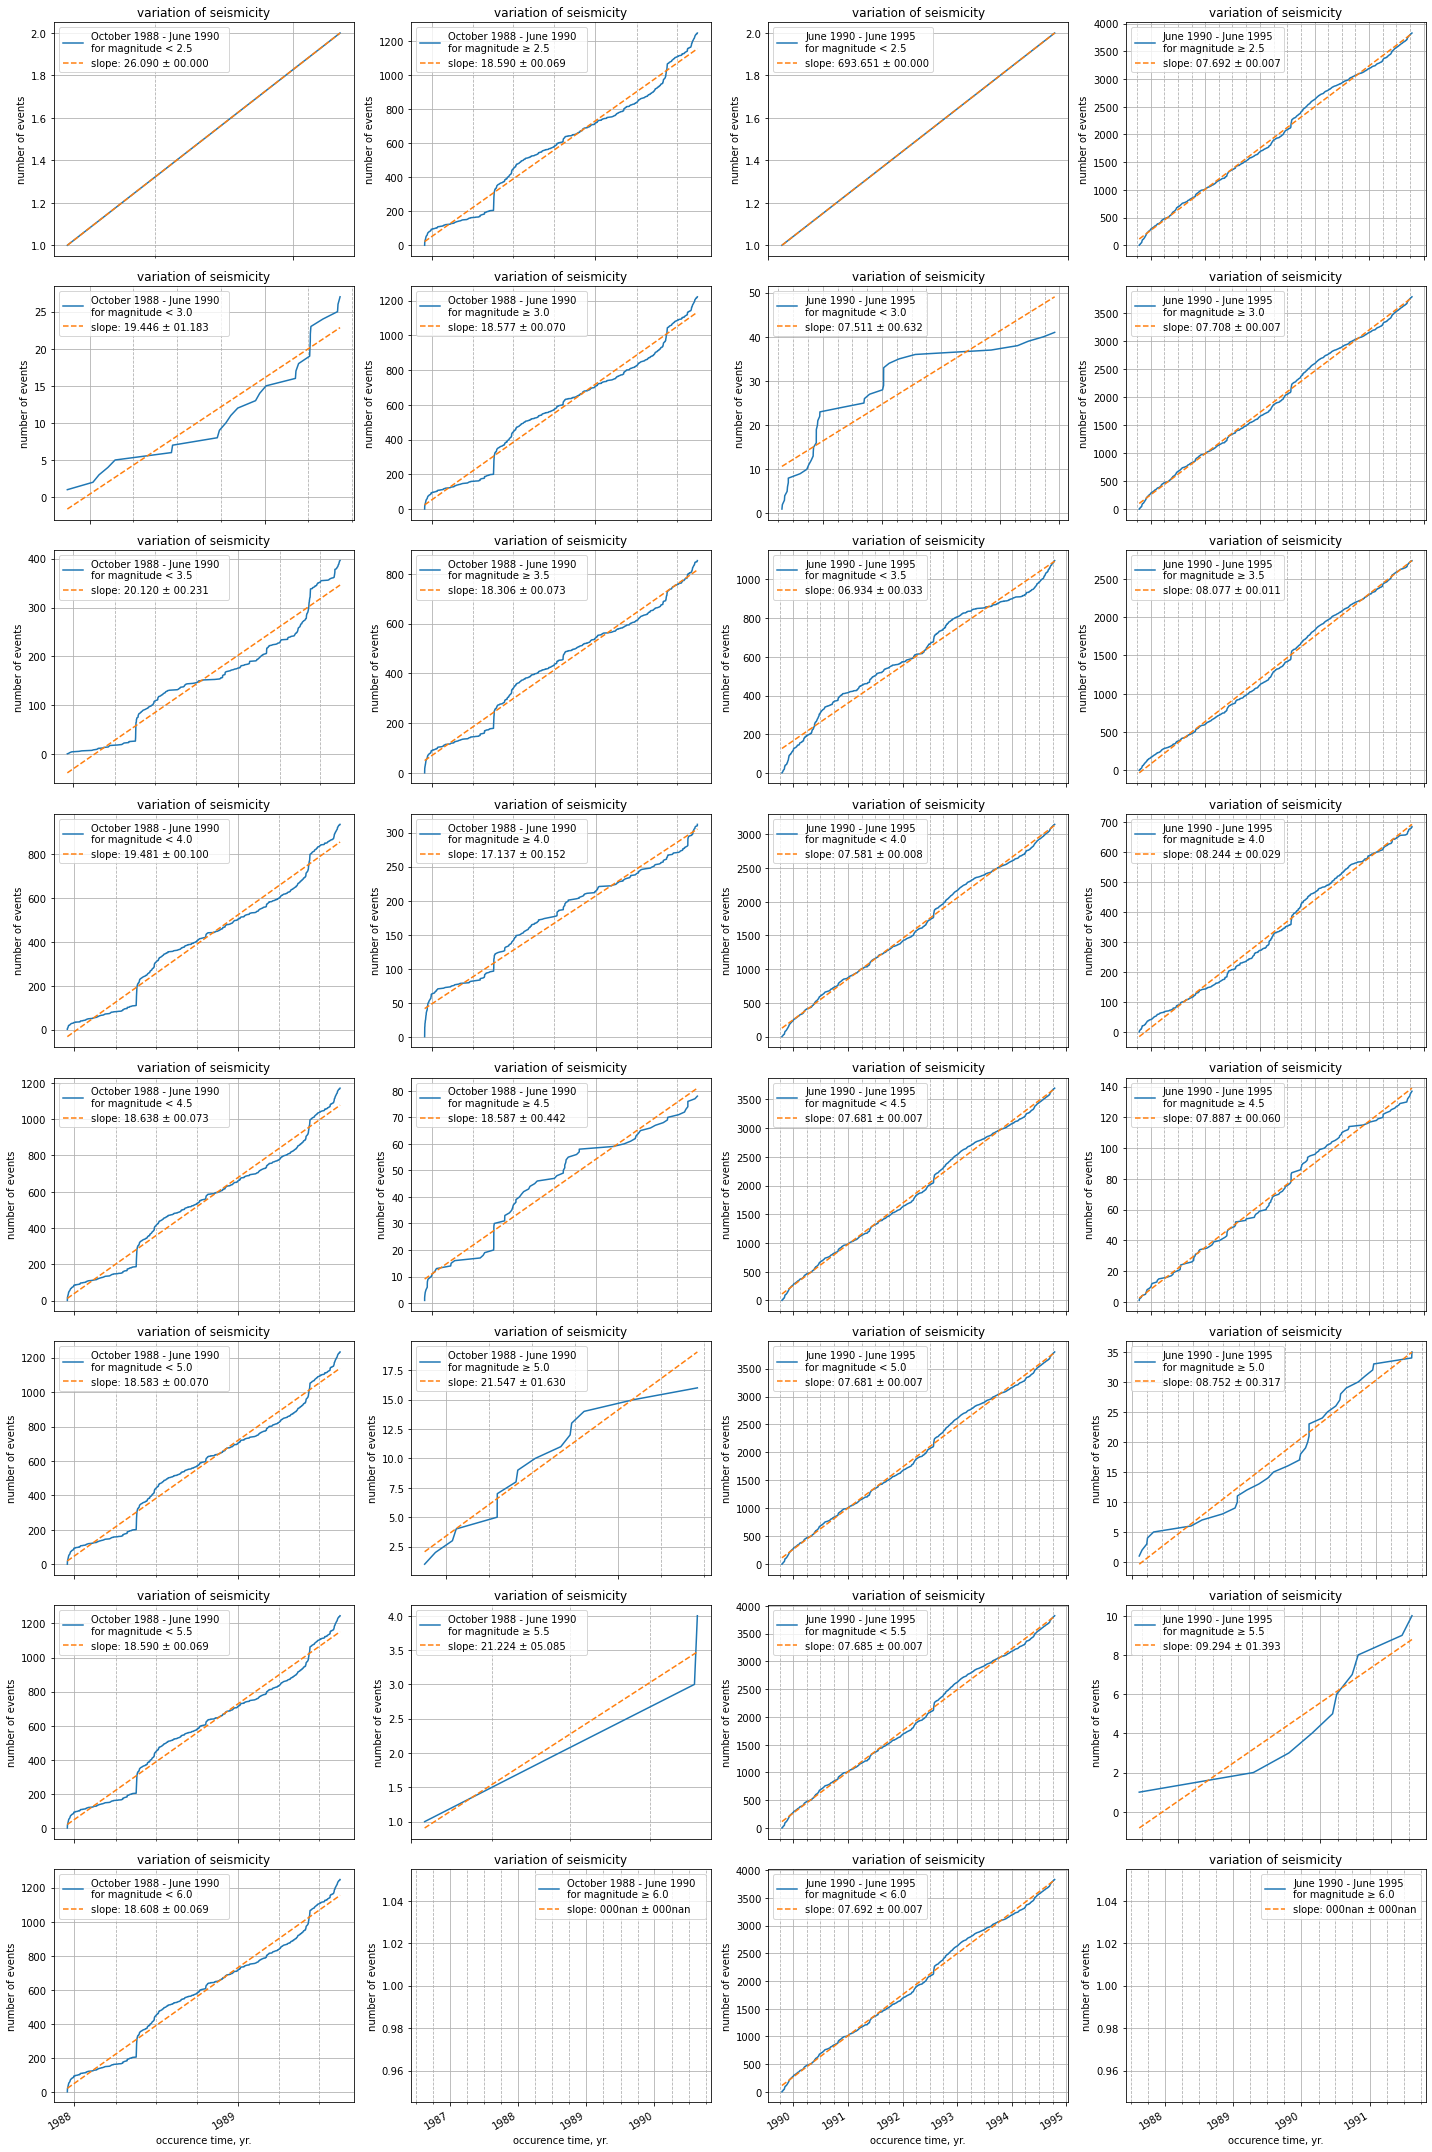

In [70]:
# (fig3, ax3) = pyplot.subplots(figsize=(8, 6))

(fig, ax) = pyplot.subplots(nrows=8, ncols=4, figsize=(20, 30))

x = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]
y = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]

x_nparray = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]
y_nparray = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]

rates_mean = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]
rates_stdd = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]
event_coun = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]

period = ['October 1988 - June 1990 ','June 1990 - June 1995']
than = ['<', '≥']

for i in range(0,2):
    for j in range(0,2):
        for k in range(0,8):
            
            if (i == 0):
                if (j == 0):
                    q = 0
                if (j == 1):
                    q = 1
            if (i == 1):
                if (j == 0):
                    q = 2
                if (j == 1):
                    q = 3
            
            x[i][j][k] = df_papr_fig7[i][j][k].index
            y[i][j][k] = df_papr_fig7[i][j][k]['event']
            
            ax[k][q].plot_date(x[i][j][k], y[i][j][k], linestyle='solid', markersize=0)

            # SciPy statistics *linregress()* for linear regression

            x_nparray[i][j][k] = numpy.array(x[i][j][k].values, dtype=float)
            y_nparray[i][j][k] = numpy.array(y[i][j][k].values, dtype=float)

            (slop, intrcept, r_val, p_val, std_err) = stats.linregress(x_nparray[i][j][k], y_nparray[i][j][k])

            xf = numpy.linspace(min(x_nparray[i][j][k]), max(x_nparray[i][j][k]), 100)
            xf_copy = xf.copy()
            xf_copy = pandas.to_datetime(xf_copy)
            yf = (slop * xf + intrcept)

            ax[k][q].plot(xf_copy, yf, linestyle='--')

            # Call numpy.linalg.norm(arr) to find the normal form of an array arr. 
            # Divide an array by its norm to normalize the array.

            norm = numpy.linalg.norm(x_nparray[i][j][k])
            x_nparray[i][j][k] = x_nparray[i][j][k]/norm
            norm = numpy.linalg.norm(y_nparray[i][j][k])
            y_nparray[i][j][k] = y_nparray[i][j][k]/norm

            # rates_mean[i][j][k] = numpy.polyfit(x_nparray[i][j][k], y_nparray[i][j][k], 1)    
            (slop, intrcept, r_val, p_val, std_err) = stats.linregress(x_nparray[i][j][k], y_nparray[i][j][k])

            magn = 2.5 + (k * 0.5)

            # calculating rates
            
            ax[k][q].legend(('{0} \nfor magnitude {1} {2:03.1f}'.format(period[i], than[j], magn), 'slope: {0:06.3f} ± {1:06.3f}'.format(slop, std_err),))
            
            rates_mean[i][j][k] = slop
            rates_stdd[i][j][k] = std_err
            event_coun[i][j][k] = df_papr_fig7[i][j][k].count()

            # Plotting attributes

            lctr_major = dates.MonthLocator(interval=12)
            lctr_minor = dates.MonthLocator(interval=3)

            fmtr_major = dates.DateFormatter('%Y')
            fmtr_minor = dates.DateFormatter('%m')

            fig.set_tight_layout(True)
            fig.autofmt_xdate()
            
            ax[k][q].set_title('variation of seismicity')
            ax[k][q].set_xlabel('occurence time, yr.')
            ax[k][q].set_ylabel('number of events')

            ax[k][q].xaxis.set_major_locator(lctr_major)
            ax[k][q].xaxis.set_minor_locator(lctr_minor)
            
            ax[k][q].xaxis.set_major_formatter(fmtr_major)
            # ax[k][q].xaxis.set_minor_formatter(fmtr_minor)

            ax[k][q].grid(True, which='major')
            ax[k][q].grid(True, which='minor', linestyle='--')    

            x[i][j][k] = df_papr_fig7[i][j][k].index
            y[i][j][k] = df_papr_fig7[i][j][k]['event']

In [71]:
rates_mean

[[[26.089928062113987,
   19.44587762154599,
   20.12042505255715,
   19.480900093230826,
   18.637548628198076,
   18.582948993376466,
   18.59035337746476,
   18.60769805607163],
  [18.590186515237637,
   18.57690358667468,
   18.30627755318254,
   17.136961952939288,
   18.586970563055882,
   21.546642705525237,
   21.224298055867077,
   nan]],
 [[693.6514843660957,
   7.510519416773066,
   6.933683652035151,
   7.580734660425069,
   7.681457666585369,
   7.680596327250996,
   7.685398364583396,
   7.692174222462686],
  [7.69161420992186,
   7.708270311624488,
   8.076945204008062,
   8.244372714333524,
   7.8874977356554385,
   8.752160825331758,
   9.294296858093883,
   nan]]]

### z-value function

In [72]:
df_papr_fig7[1][1][6]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1990-06-16 02:16:20.400,17800,39.13,20.38,38,6.0,1
1992-01-23 04:24:16.700,19718,38.28,20.41,3,5.5,2
1992-07-23 20:12:45.200,20231,39.82,24.43,19,5.5,3
1992-11-18 21:10:43.100,20549,38.27,22.33,23,5.7,4
1993-03-05 06:55:06.400,20817,37.07,21.46,1,5.8,5
1993-03-26 11:58:18.300,20874,37.65,21.44,1,5.5,6
1993-06-13 23:26:40.000,21250,39.25,20.57,5,5.9,7
1993-07-14 12:31:50.200,21382,38.16,21.76,13,5.6,8
1994-02-25 02:30:49.700,22062,38.73,20.58,5,5.8,9


In [73]:
def calcz (df1, df2):
    
    fract1 = numpy.power(df1.std(), 2) / df1.count()
    fract2 = numpy.power(df2.std(), 2) / df2.count()
    
    numeratr = df1.mean() - df2.mean()
    denominatr = numpy.sqrt(fract1 + fract2)
    
    return numeratr / denominatr

# def calcv (rate1, stdd1, count1, rate2, stdd2,  count2):
    
#     fract1 = numpy.power(stdd1, 2) / count1
#     fract2 = numpy.power(stdd2, 2) / count2
    
#     numeratr = rate1 - rate2
#     denominatr = numpy.sqrt(fract1 + fract2)
    
#     return numeratr / denominatr

In [74]:
# x_fig7_nparray = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]
# y_fig7_nparray = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]

# ratez = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]
# stdev = [[[None for k in range(0,8)] for j in range(0,2)] for i in range(0,2)]

# def func(x, a, b):
#     return a * x + b

# for i in range(0, 2):
#     for j in range(0, 2):
#         for k in range(0, 8):
            
#             x_fig7_nparray[i][j][k] = numpy.array(df_papr_fig7[i][j][k].index, dtype = int)
#             y_fig7_nparray[i][j][k] = numpy.array(df_papr_fig7[i][j][k]['event'].values)
            
#             slope, intercept, r_value, p_value, std_error = stats.linregress(x_fig7_nparray[i][j][k], y_fig7_nparray[i][j][k])

#             ratez[i][j][k] = slope
#             stdev[i][j][k] = std_error

In [75]:
z = [[None for k in range(0, 8)] for j in range(0, 2)]
# v = [[None for k in range(0, 8)] for j in range(0, 2)]

#   z[j][k]    
#       
#       j = 0: below
#
#           k = 0:  magnitude < 2.5
#           k = 1:  magnitude < 3.0
#           k = 2:  magnitude < 3.5
#           k = 3:  magnitude < 4.0
#           k = 4:  magnitude < 4.5
#           k = 5:  magnitude < 5.0
#           k = 6:  magnitude < 5.5
#           k = 7:  magnitude < 6.0
#  
#       j = 1: above
#
#           k = 0:  2.5 <= magnitude
#           k = 1:  3.0 <= magnitude
#           k = 2:  3.5 <= magnitude
#           k = 3:  4.0 <= magnitude
#           k = 4:  4.5 <= magnitude
#           k = 5:  5.0 <= magnitude
#           k = 6:  5.5 <= magnitude
#           k = 7:  6.0 <= magnitude

for j in range(0, 2):
    for k in range(0, 8):
        z[j][k] = calcz(df_papr_fig7[0][j][k]['event'], df_papr_fig7[1][j][k]['event'])

# for j in range(0, 2):
#     for k in range(0, 8):
#         v[j][k] = calcv(ratez[0][j][k], stdev[0][j][k], df_papr_fig7[0][j][k]['event'].count(), ratez[1][j][k], stdev[1][j][k], df_papr_fig7[1][j][k]['id'].count())

In [76]:
# (z, v)

### magnitude signature plots

Text(0, 0.5, 'z-value')

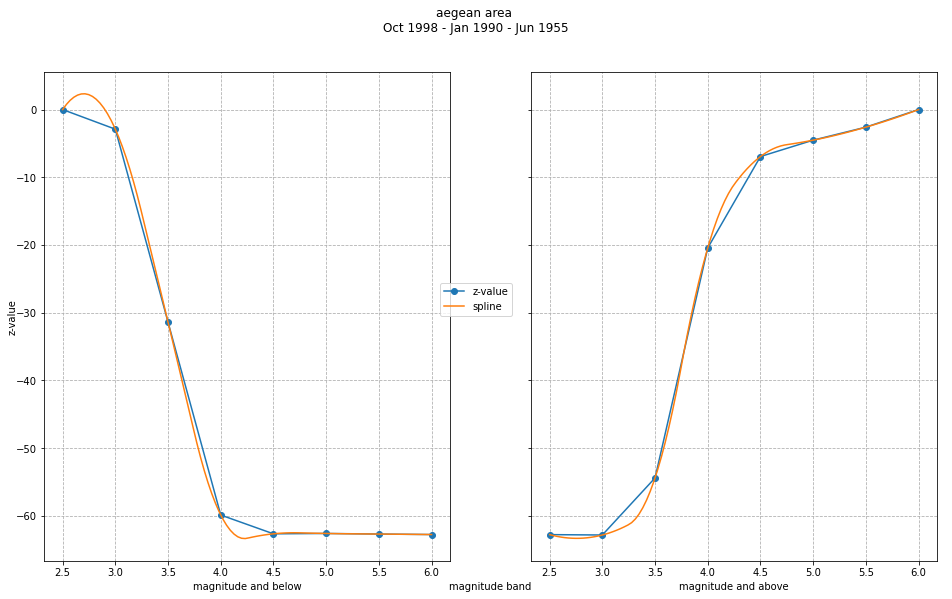

In [77]:
(fig7z, ax7z) = pyplot.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 9))

x_fig7z = [None for k in range(0, 8)]
y_fig7z = [[None for k in range(0, 8)] for j in range(0, 2)]

for k in range(0,8):
    x_fig7z[k] = (2.5 + (0.5 * k))

for j in range(0, 2):
    for k in range(0, 8):
        y_fig7z[j][k] = z[j][k]
        if (y_fig7z[j][k].astype(str) == 'nan'):
            y_fig7z[j][k] = 0.0

for j in range(0,2):
    ax7z[j].plot(x_fig7z, y_fig7z[j], marker='o')

x_fig7z_smooth = numpy.linspace(2.5, 6.0, 100)

for j in range(0, 2):
    spl = interpolate.make_interp_spline(x_fig7z, y_fig7z[j], k=2)
    y_fig7z_smooth = spl(x_fig7z_smooth)
    ax7z[j].plot(x_fig7z_smooth, y_fig7z_smooth)


fig7z.suptitle('aegean area \nOct 1998 - Jan 1990 - Jun 1955')
fig7z.legend(('z-value', 'spline'), loc='center')

ax7z[0].set_xlabel('magnitude and below')
ax7z[1].set_xlabel('magnitude and above')

for j in range(0,2):
    ax7z[j].grid(True, linestyle='--')    

fig7z.add_subplot(111, frame_on=False)
pyplot.tick_params(labelcolor="none", bottom=False, left=False)
pyplot.xlabel("magnitude band")
pyplot.ylabel("z-value")



In [78]:
# (fig7v, ax7v) = pyplot.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 9))

# x_fig7v = [None for k in range(0, 8)]
# y_fig7v = [[None for k in range(0, 8)] for j in range(0, 2)]

# for k in range(0,8):
#     x_fig7v[k] = (2.5 + (0.5 * k))

# for j in range(0, 2):
#     for k in range(0, 8):
#         y_fig7v[j][k] = v[j][k]
#         if ((y_fig7v[j][k].astype(str) == 'nan') or ((y_fig7v[j][k].astype(str) == '-inf'))):
#             y_fig7v[j][k] = 0

# for j in range(0,2):
#     ax7v[j].plot(x_fig7v, y_fig7v[j], marker='o')

# x_fig7v_smooth = numpy.linspace(2.5, 6.0, 100)

# for j in range(0, 2):
#     spl = interpolate.make_interp_spline(x_fig7v, y_fig7v[j], k=2)
#     y_fig7v_smooth = spl(x_fig7v_smooth)
#     ax7v[j].plot(x_fig7v_smooth, y_fig7v_smooth)


# fig7v.suptitle('aegean area \nOct 1998 - Jan 1990 - Jun 1955')
# fig7v.legend(('z-value', 'spline'), loc='center')

# ax7v[0].set_xlabel('magnitude and below')
# ax7v[1].set_xlabel('magnitude and above')

# for j in range(0,2):
#     ax7v[j].grid(True, linestyle='--')    

# fig7v.add_subplot(111, frame_on=False)
# pyplot.tick_params(labelcolor="none", bottom=False, left=False)
# pyplot.xlabel("magnitude band")
# pyplot.ylabel("v-value")


## i/o

In [79]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,3
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,4
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,5
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,11316
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,11317
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


*In the present work, we are concerned with ANNs which can predict earthquakes of magni- tudes M56.0, the largest events in our data sets. Nine earthquakes in the magnitude range 6.0–6.9 haveo ccurred in the Peloponnesos-Aegean area for the considered time interval, with the mean recurrence time of 1.7 yr.*

In [80]:
df_papr.loc[df_papr['magnitude'] >= 6.0].count()

id           9
latitude     9
longitude    9
depth        9
magnitude    9
event        9
dtype: int64

### input

*...the input information used for training the network are mean seismicity rates in selected time intervals (acually, within the time intervals between the M≥6.0 earthquakes), and occasionally (when such data are representative) also in selected magnitude ranges.*

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html

https://www.geeksforgeeks.org/python-mean-squared-error/

In [81]:
df_papr.loc[(df_papr['magnitude'] >= 4.5) & (df_papr['magnitude'] < 5.0)].count()

id           456
latitude     456
longitude    456
depth        456
magnitude    456
event        456
dtype: int64

In [82]:
df_papr.loc[(df_papr['magnitude'] >= 5.0)].count()

id           137
latitude     137
longitude    137
depth        137
magnitude    137
event        137
dtype: int64

- v1p: mean seismicity rate, [p, p+1) 4.5 ≤ magnitude < 5.0
- v2p: mean seismicity rate, [p, p+1) 5.0 ≤ magnitude      

In [83]:
df_papr.loc[df_papr['magnitude'] >= 6.0]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-18 19:27:23.000,10059,39.90,24.50,10,6.9,46
1982-06-22 03:04:26.000,10683,37.10,21.20,10,6.2,530
1983-01-17 12:41:30.900,11187,37.97,20.25,9,6.7,886
1983-01-19 00:02:15.500,11271,38.05,20.41,6,6.0,966
1983-03-23 23:51:07.600,11631,38.19,20.40,10,6.2,1285
1986-09-13 17:24:33.800,14722,37.10,22.19,1,6.0,3255
1988-10-16 12:34:05.400,15960,37.90,20.96,4,6.0,4113
1990-06-16 02:16:20.400,17800,39.13,20.38,38,6.0,5362
1995-06-15 00:15:51.000,24206,38.37,22.15,26,6.1,9194


In [84]:
df_papr.loc[(df_papr['id'] > 11187) & (df_papr['id'] < 11271) & (df_papr['magnitude'] >= 3.2) & (df_papr['magnitude'] < 4.1)]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1983-01-17 23:43:35.500,11225,38.14,20.84,38,4.0,923
1983-01-18 20:57:55.000,11264,38.24,23.11,8,3.2,959


In [85]:
id6 = [i for i in df_papr['id'].loc[df_papr['magnitude'] >= 6.0]]
id6

[10059, 10683, 11187, 11271, 11631, 14722, 15960, 17800, 24206]

*Use of two seismic rates, v1 for events in the magnitude range of 3.5≤M<4.0 (with n1=5157) and v2 for quakes with M≥4.0 (n2=2794), ensured a better performance of the network.*

In [86]:
(df_papr.loc[(df_papr['magnitude'] >= 4.0) & (df_papr['magnitude'] < 5.0)].count(), df_papr.loc[(df_papr['magnitude'] >= 5.0)].count())

(id           2647
 latitude     2647
 longitude    2647
 depth        2647
 magnitude    2647
 event        2647
 dtype: int64,
 id           137
 latitude     137
 longitude    137
 depth        137
 magnitude    137
 event        137
 dtype: int64)

*We have considered seismic rates v1,p and v2,p, where p denotes the time interval between the pth and the next large earthquakes. For the Aegean data set p=l,...,8. Experiments with different input layer sets have shown that the optimum configuration consisted of four neurons: v1,p-1, v2,p-1, v1,p, v2p.*

In [87]:
fltr = [[None for j in range(0, len(id6) - 1)] for i in range(0, 2)]
df_nn_input = [[None for j in range(0, len(id6) - 1)] for i in range(0, 2)]

for j in range(0, len(id6) - 1):
    fltr[0][j] = (df_papr['magnitude'] >= 4.0) & (df_papr['magnitude'] < 5.0) & (df_papr['id'] >= id6[j]) & (df_papr['id'] <= id6[j+1])
    fltr[1][j] = (df_papr['magnitude'] >= 5.0)                                & (df_papr['id'] >= id6[j]) & (df_papr['id'] <= id6[j+1])

for i in range(0, 2):
    for j in range(0, len(id6) - 1):
        df_nn_input[i][j] = df_papr.loc[fltr[i][j]].copy()
        
        df_nn_input[i][j]['event'] = 1
        df_nn_input[i][j]['event'] = df_nn_input[i][j]['event'].cumsum()

df_nn_input[0][2]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1983-01-17 12:54:17.100,11188,38.10,20.54,10,4.8,1
1983-01-17 12:56:40.600,11189,38.07,20.62,1,4.7,2
1983-01-17 13:03:15.800,11190,38.71,20.95,40,4.5,3
1983-01-17 13:22:20.000,11191,37.65,20.21,12,4.4,4
1983-01-17 13:24:05.900,11192,37.98,20.33,10,4.4,5
...,...,...,...,...,...,...
1983-01-18 21:11:41.000,11265,38.13,20.77,10,4.1,71
1983-01-18 21:38:50.200,11266,37.88,20.31,10,4.5,72
1983-01-18 21:44:40.500,11267,38.03,20.55,10,4.4,73


*In the present analysis the mean seismicity rates within the intervals between large earthquakes, calculated from the cumulative activity curves by least-squares fitting, have been used as input values to the network.*

In [88]:
x_input_nparray = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]
y_input_nparray = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]

# slope = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]
# intercept = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]
# r_value = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]
# p_value = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]
# std_error = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]

nn_input = [[None for j in range(0, len(id6) - 1)] for j in range(0,2)]

def func(x, a, b):
    return a * x + b

for i in range(0, 2):
    for j in range(0, len(id6) - 1):

        x_input_nparray[i][j] = numpy.array(df_nn_input[i][j].index)
        y_input_nparray[i][j] = numpy.array(df_nn_input[i][j]['event'])

        # norm = numpy.linalg.norm(x_input_nparray[i][j])
        # x_input_nparray[i][j] = x_input_nparray[i][j]/norm
        # norm = numpy.linalg.norm(y_input_nparray[i][j])
        # y_input_nparray[i][j] = y_input_nparray[i][j]/norm

        popt, pcov = optimize.curve_fit(func, x_input_nparray[i][j], y_input_nparray[i][j])

        # x_input_nparray[i][j] = numpy.array(df_nn_input[i][j].index.values, dtype=float)
        # y_input_nparray[i][j] = numpy.array(df_nn_input[i][j]['event'].values, dtype=float)

        # slope[i][j], intercept[i][j], r_value[i][j], p_value[i][j], std_error[i][j] = stats.linregress(x_input_nparray[i][j], y_input_nparray[i][j])
        
        nn_input[i][j] = popt[0]

nn_input[0][0]

9.875936485316464e-15

*Since the activity function falls in the range of 0–1 for all values of parameters, the input-output amounts have been normalized to this range. Seismicity rates v1 and v2 showed values in the ranges of 180–540 and 120–1300 events/yr, respectively. The time intervals between large earthquakes were scaled from the actually observed range of 0.004–4.997 yr into 0–1.*

In [89]:
nn_input = numpy.array(nn_input).reshape(-1,1)

scaler = preprocessing.MinMaxScaler()
nn_input_scaled = scaler.fit_transform(nn_input)

nn_input_scaled = numpy.array(nn_input_scaled).reshape(2, len(id6) - 1)
nn_input_scaled

array([[1.72001006e-02, 8.23329753e-03, 1.00000000e+00, 6.97218806e-02,
        8.47124968e-03, 6.06652857e-03, 7.98768359e-03, 7.15065725e-03],
       [4.55775746e-04, 1.56931083e-04, 3.97559189e-02, 2.19664762e-03,
        0.00000000e+00, 8.12598605e-05, 1.34954230e-04, 1.14176494e-05]])

### output

*...the output values are the time intervals between subsequent large earthquakes.*

In [90]:
fltr = (df_papr['id'] >= 10059) & (df_papr['id'] <= 24206)
df_papr.loc[fltr]

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-18 19:27:23.000,10059,39.90,24.50,10,6.9,46
1982-01-18 19:31:14.000,10060,39.80,24.20,10,5.7,47
1982-01-18 19:41:05.000,10061,39.70,24.40,10,4.2,48
1982-01-18 19:46:32.000,10062,39.80,24.50,10,4.5,49
1982-01-18 19:52:39.000,10063,39.70,24.40,10,4.0,50
...,...,...,...,...,...,...
1995-06-13 02:48:39.800,24197,38.29,22.47,10,3.1,9190
1995-06-14 11:08:41.600,24203,38.04,21.54,28,3.0,9191
1995-06-14 19:15:32.500,24204,37.61,20.88,5,3.2,9192


In [91]:
df_nn_output = df_papr.loc[fltr].copy()
df_nn_output

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-18 19:27:23.000,10059,39.90,24.50,10,6.9,46
1982-01-18 19:31:14.000,10060,39.80,24.20,10,5.7,47
1982-01-18 19:41:05.000,10061,39.70,24.40,10,4.2,48
1982-01-18 19:46:32.000,10062,39.80,24.50,10,4.5,49
1982-01-18 19:52:39.000,10063,39.70,24.40,10,4.0,50
...,...,...,...,...,...,...
1995-06-13 02:48:39.800,24197,38.29,22.47,10,3.1,9190
1995-06-14 11:08:41.600,24203,38.04,21.54,28,3.0,9191
1995-06-14 19:15:32.500,24204,37.61,20.88,5,3.2,9192


In [92]:
nn_output = [None for j in range(0, len(id6) - 1)]


for j in range(0, len(id6) - 1):
    nn_output[j] = numpy.array(df_nn_output.loc[df_nn_output['id'] == id6[j + 1]].index - df_nn_output.loc[df_nn_output['id'] == id6[j]].index)
    # nn_output[i][j] = nn_output[i][j].astype(int)
    # nn_output[i][j] = (df_nn_output.loc[df_nn_output['id'] == id6[i + 1]].index - df_nn_output.loc[df_nn_output['id'] == id6[i]]).delta

nn_output[1][0]

numpy.timedelta64(18092224900000000,'ns')

*Since the activity function falls in the range of 0–1 for all values of parameters, the input-output amounts have been normalized to this range. Seismicity rates v1 and v2 showed values in the ranges of 180–540 and 120–1300 events/yr, respectively. The time intervals between large earthquakes were scaled from the actually observed range of 0.004–4.997 yr into 0–1.*

In [93]:
nn_output = numpy.array(nn_output).reshape(-1,1)

scaler = preprocessing.MinMaxScaler()
nn_output_scaled = scaler.fit_transform(nn_output)

nn_output_scaled = numpy.array(nn_output_scaled).reshape(1, len(id6) - 1)
nn_output_scaled 

array([[0.08382198, 0.11403041, 0.        , 0.03428652, 0.6955295 ,
        0.41806917, 0.33239211, 1.        ]])

## neural network

In [94]:
import torch

torch.cuda.is_available()

True

In [95]:
nn_input_scaled

array([[1.72001006e-02, 8.23329753e-03, 1.00000000e+00, 6.97218806e-02,
        8.47124968e-03, 6.06652857e-03, 7.98768359e-03, 7.15065725e-03],
       [4.55775746e-04, 1.56931083e-04, 3.97559189e-02, 2.19664762e-03,
        0.00000000e+00, 8.12598605e-05, 1.34954230e-04, 1.14176494e-05]])

In [96]:
nnin = numpy.array([[0.0 for j in range(0, len(id6) - 2)] for i in range(0,4)])

for j in range(0, len(id6) - 2):
    nnin[0][j] = nn_input_scaled[0][j + 1]
    nnin[1][j] = nn_input_scaled[0][j]
    nnin[2][j] = nn_input_scaled[1][j + 1]
    nnin[3][j] = nn_input_scaled[1][j]

nnin

array([[8.23329753e-03, 1.00000000e+00, 6.97218806e-02, 8.47124968e-03,
        6.06652857e-03, 7.98768359e-03, 7.15065725e-03],
       [1.72001006e-02, 8.23329753e-03, 1.00000000e+00, 6.97218806e-02,
        8.47124968e-03, 6.06652857e-03, 7.98768359e-03],
       [1.56931083e-04, 3.97559189e-02, 2.19664762e-03, 0.00000000e+00,
        8.12598605e-05, 1.34954230e-04, 1.14176494e-05],
       [4.55775746e-04, 1.56931083e-04, 3.97559189e-02, 2.19664762e-03,
        0.00000000e+00, 8.12598605e-05, 1.34954230e-04]])

In [97]:
nn_output_scaled

array([[0.08382198, 0.11403041, 0.        , 0.03428652, 0.6955295 ,
        0.41806917, 0.33239211, 1.        ]])

In [98]:
nnout = numpy.array([[0.0 for j in range(0, len(id6) - 2)] for i in range(0,4)])

for j in range(0, len(id6) - 2):
    nnout[0][j] = nn_output_scaled[0][j+1]
    nnout[1][j] = nn_output_scaled[0][j]
    nnout[2][j] = nn_output_scaled[0][j+1]
    nnout[3][j] = nn_output_scaled[0][j]

nnout

array([[0.11403041, 0.        , 0.03428652, 0.6955295 , 0.41806917,
        0.33239211, 1.        ],
       [0.08382198, 0.11403041, 0.        , 0.03428652, 0.6955295 ,
        0.41806917, 0.33239211],
       [0.11403041, 0.        , 0.03428652, 0.6955295 , 0.41806917,
        0.33239211, 1.        ],
       [0.08382198, 0.11403041, 0.        , 0.03428652, 0.6955295 ,
        0.41806917, 0.33239211]])

In [99]:
nnin = torch.tensor(nnin, dtype=torch.float)
nnout = torch.tensor(nnout, dtype=torch.float)
nnpred = nnin.clone().detach()

In [100]:
(nnin, nnin.size()) # [3, 2]

(tensor([[8.2333e-03, 1.0000e+00, 6.9722e-02, 8.4712e-03, 6.0665e-03, 7.9877e-03,
          7.1507e-03],
         [1.7200e-02, 8.2333e-03, 1.0000e+00, 6.9722e-02, 8.4712e-03, 6.0665e-03,
          7.9877e-03],
         [1.5693e-04, 3.9756e-02, 2.1966e-03, 0.0000e+00, 8.1260e-05, 1.3495e-04,
          1.1418e-05],
         [4.5578e-04, 1.5693e-04, 3.9756e-02, 2.1966e-03, 0.0000e+00, 8.1260e-05,
          1.3495e-04]]),
 torch.Size([4, 7]))

In [101]:
(nnout, nnout.size()) # [3, 1]

(tensor([[0.1140, 0.0000, 0.0343, 0.6955, 0.4181, 0.3324, 1.0000],
         [0.0838, 0.1140, 0.0000, 0.0343, 0.6955, 0.4181, 0.3324],
         [0.1140, 0.0000, 0.0343, 0.6955, 0.4181, 0.3324, 1.0000],
         [0.0838, 0.1140, 0.0000, 0.0343, 0.6955, 0.4181, 0.3324]]),
 torch.Size([4, 7]))

https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0

In [102]:
class QuakeNN(torch.nn.Module):

    def __init__(self, ):
        super(QuakeNN, self).__init__()
        
        self.inputSize = 7
        self.outputSize = 7
        self.hiddenSize = 4
        
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) 
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) 
        
    def forward(self, nnin):
        self.z = torch.matmul(nnin, self.W1) 
        self.z2 = self.sigmoid(self.z) 
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) 
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))

    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def backward(self, nnin, nnout, o):
        self.o_error = nnout - o 
        self.o_delta = self.o_error * self.sigmoidPrime(o) 
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(nnin), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)

    def train(self, nnin, nnout):
        o = self.forward(nnin)
        self.backward(nnin, nnout, o)

    def saveWeights(self, model):
        torch.save(model, "NN")

    def predict(self):
        print ("\nweighted prediction data: \n")
        print ("input: \n" + str(nnpred))
        print ("output: \n" + str(self.forward(nnpred)))

In [103]:
NN1000 = QuakeNN()

for i in range(1000):
    print ("#" + str(i) + " Loss: " + str(torch.mean((nnout - NN1000(nnin))**2).detach().item()))
    NN1000.train(nnin, nnout)

NN1000.saveWeights(NN1000)
NN1000.predict()

94 Loss: 0.01589304767549038
#395 Loss: 0.015891512855887413
#396 Loss: 0.015889979898929596
#397 Loss: 0.015888448804616928
#398 Loss: 0.01588691957294941
#399 Loss: 0.015885384753346443
#400 Loss: 0.015883851796388626
#401 Loss: 0.01588231697678566
#402 Loss: 0.01588078774511814
#403 Loss: 0.015879260376095772
#404 Loss: 0.015877725556492805
#405 Loss: 0.01587619259953499
#406 Loss: 0.015874667093157768
#407 Loss: 0.015873132273554802
#408 Loss: 0.015871603041887283
#409 Loss: 0.015870068222284317
#410 Loss: 0.015868540853261948
#411 Loss: 0.01586700975894928
#412 Loss: 0.01586548052728176
#413 Loss: 0.015863947570323944
#414 Loss: 0.015862416476011276
#415 Loss: 0.015860887244343758
#416 Loss: 0.01585935428738594
#417 Loss: 0.015857825055718422
#418 Loss: 0.015856292098760605
#419 Loss: 0.015854762867093086
#420 Loss: 0.01585323177278042
#421 Loss: 0.01585170067846775
#422 Loss: 0.015850162133574486
#423 Loss: 0.015848632901906967
#424 Loss: 0.01584710367023945
#425 Loss: 0.01584557

In [104]:
NN1000.forward(nnpred)[0].tolist()

[0.08115780353546143,
 0.019781239330768585,
 0.015270876698195934,
 0.737700879573822,
 0.40051037073135376,
 0.30797967314720154,
 0.9755991101264954]

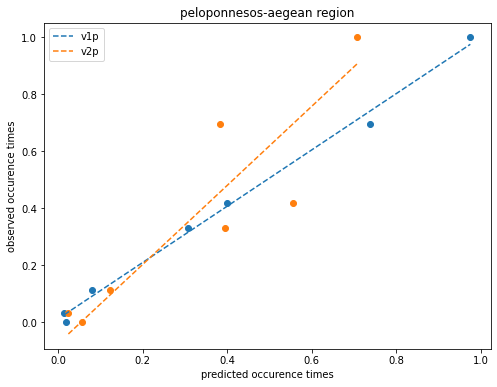

In [105]:
(fig, ax) = pyplot.subplots(figsize=(8, 6))

def func(x, a, b):
    return a * x + b

for i in range(0, 4, 2):

    x = NN1000.forward(nnpred)[i].tolist()
    y = nnout[i].tolist()

    ax.scatter(x, y)

    x = sorted(x, key=float)
    y = sorted(y, key=float)

    popt, pcov = optimize.curve_fit(func, x, y)

    xf = numpy.linspace(min(x), max(x), 1000)
    yf = (popt[0] * xf) + popt[1]

    ax.plot(xf, yf, linestyle='--')

ax.set_title('peloponnesos-aegean region')
ax.set_xlabel('predicted occurence times')
ax.set_ylabel('observed occurence times')

ax.legend(('v1p', 'v2p'))

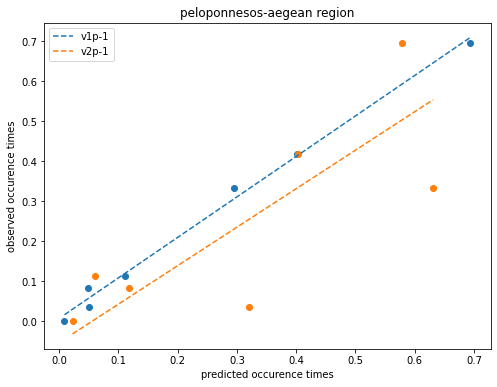

In [106]:
(fig, ax) = pyplot.subplots(figsize=(8, 6))

def func(x, a, b):
    return a * x + b

for i in range(1, 4, 2):

    x = NN1000.forward(nnpred)[i].tolist()
    y = nnout[i].tolist()

    ax.scatter(x, y)

    x = sorted(x, key=float)
    y = sorted(y, key=float)

    popt, pcov = optimize.curve_fit(func, x, y)

    xf = numpy.linspace(min(x), max(x), 1000)
    yf = (popt[0] * xf) + popt[1]

    ax.plot(xf, yf, linestyle='--')

ax.set_title('peloponnesos-aegean region')
ax.set_xlabel('predicted occurence times')
ax.set_ylabel('observed occurence times')

ax.legend(('v1p-1', 'v2p-1'))

https://brsoff.github.io/tutorials/beginner/examples_nn/two_layer_net_module.html

In [107]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        # In the constructor we instantiate two nn.Linear modules and assign them as member variables.
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
D_in, H, D_out = 7, 4, 7

x = nnin
y = nnout

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(10000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

7831118702888489
9163 0.7830880284309387
9164 0.783064067363739
9165 0.7830402851104736
9166 0.7830164432525635
9167 0.7829926013946533
9168 0.7829687595367432
9169 0.782944917678833
9170 0.7829211354255676
9171 0.7828972339630127
9172 0.7828735709190369
9173 0.7828496098518372
9174 0.782825767993927
9175 0.7828019261360168
9176 0.7827780842781067
9177 0.7827542424201965
9178 0.7827304005622864
9179 0.782706618309021
9180 0.7826826572418213
9181 0.7826588153839111
9182 0.7826350331306458
9183 0.7826111912727356
9184 0.7825874090194702
9185 0.7825635075569153
9186 0.7825395464897156
9187 0.782515823841095
9188 0.78249192237854
9189 0.7824681997299194
9190 0.7824442982673645
9191 0.7824204564094543
9192 0.7823965549468994
9193 0.782372772693634
9194 0.7823488116264343
9195 0.7823249697685242
9196 0.782301127910614
9197 0.7822772264480591
9198 0.7822534441947937
9199 0.7822295427322388
9200 0.7822057008743286
9201 0.7821817398071289
9202 0.7821580171585083
9203 0.7821341753005981
9204 0.7

In [108]:
y_pred.tolist()

[[0.19836056232452393,
  -0.06928663700819016,
  -0.021044880151748657,
  0.49452680349349976,
  0.6209746599197388,
  0.43822795152664185,
  0.7984618544578552],
 [-0.00410085916519165,
  0.2399386465549469,
  0.05947895348072052,
  0.2331235110759735,
  0.5546125173568726,
  0.3488537669181824,
  0.5352109670639038],
 [0.10337942838668823,
  0.021872542798519135,
  0.014250054955482483,
  0.3742729127407074,
  0.5216346383094788,
  0.35563361644744873,
  0.6737462282180786],
 [0.09526008367538452,
  0.034326642751693726,
  0.01750054955482483,
  0.3637573719024658,
  0.5190054178237915,
  0.3520747423171997,
  0.6631879210472107]]

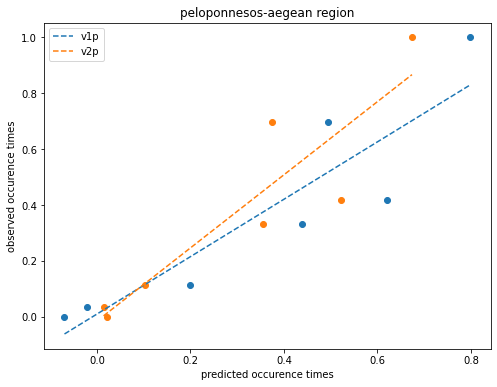

In [109]:
(fig, ax) = pyplot.subplots(figsize=(8, 6))

def func(x, a, b):
    return a * x + b

for i in range(0, 4, 2):

    x = y_pred[i].tolist()
    y = nnout[i].tolist()

    ax.scatter(x, y)

    # x = sorted(x, key=float)
    # y = sorted(y, key=float)

    popt, pcov = optimize.curve_fit(func, x, y)

    xf = numpy.linspace(min(x), max(x), 1000)
    yf = (popt[0] * xf) + popt[1]

    ax.plot(xf, yf, linestyle='--')

ax.set_title('peloponnesos-aegean region')
ax.set_xlabel('predicted occurence times')
ax.set_ylabel('observed occurence times')

ax.legend(('v1p', 'v2p'))

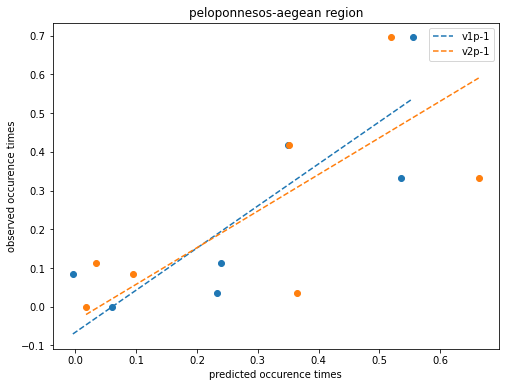

In [110]:
(fig, ax) = pyplot.subplots(figsize=(8, 6))

def func(x, a, b):
    return a * x + b

for i in range(1, 4, 2):

    x = y_pred[i].tolist()
    y = nnout[i].tolist()

    ax.scatter(x, y)

    # x = sorted(x, key=float)
    # y = sorted(y, key=float)

    popt, pcov = optimize.curve_fit(func, x, y)

    xf = numpy.linspace(min(x), max(x), 1000)
    yf = (popt[0] * xf) + popt[1]

    ax.plot(xf, yf, linestyle='--')

ax.set_title('peloponnesos-aegean region')
ax.set_xlabel('predicted occurence times')
ax.set_ylabel('observed occurence times')

ax.legend(('v1p-1', 'v2p-1'))

In [111]:
class ThreeLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    # In the constructor we instantiate three nn.Linear modules and assign them as member variables.
    super(ThreeLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, H)
    self.linear3 = torch.nn.Linear(H, D_out)

  def forward(self, x):
    h_relu = self.linear1(x).clamp(min=0)
    h_relu = self.linear2(h_relu).clamp(min=0)
    y_pred = self.linear3(h_relu)
    return y_pred

D_in, H, D_out = 7, 4, 7
model = ThreeLayerNet(D_in, H, D_out)
list(model.parameters())

x = nnin
y = nnout

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(10000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

62 0.9862920045852661
9163 0.9862908124923706
9164 0.9862896800041199
9165 0.9862884283065796
9166 0.9862873554229736
9167 0.9862861633300781
9168 0.9862851500511169
9169 0.9862840175628662
9170 0.9862827658653259
9171 0.9862815737724304
9172 0.9862805008888245
9173 0.986279308795929
9174 0.9862781167030334
9175 0.9862771034240723
9176 0.9862759113311768
9177 0.986274778842926
9178 0.9862735867500305
9179 0.9862724542617798
9180 0.9862713813781738
9181 0.9862701296806335
9182 0.9862690567970276
9183 0.9862678050994873
9184 0.9862668514251709
9185 0.9862655997276306
9186 0.9862643480300903
9187 0.9862633347511292
9188 0.9862621426582336
9189 0.9862609505653381
9190 0.986259937286377
9191 0.9862587451934814
9192 0.9862576127052307
9193 0.9862563014030457
9194 0.986255407333374
9195 0.9862541556358337
9196 0.9862530827522278
9197 0.9862518310546875
9198 0.9862507581710815
9199 0.9862496852874756
9200 0.9862484931945801
9201 0.9862472414970398
9202 0.9862461686134338
9203 0.986244976520538

In [112]:
y_pred.tolist()

[[0.10237842053174973,
  0.060108646750450134,
  0.021258965134620667,
  0.37893542647361755,
  0.5499958395957947,
  0.36493122577667236,
  0.6392810344696045],
 [0.11741567403078079,
  0.07621397078037262,
  0.009290464222431183,
  0.33317676186561584,
  0.567207932472229,
  0.40504905581474304,
  0.6957225799560547],
 [0.08601809293031693,
  0.04564125835895538,
  0.01915539801120758,
  0.3679129481315613,
  0.557704508304596,
  0.3642643988132477,
  0.6546356081962585],
 [0.08698440343141556,
  0.04663720726966858,
  0.018579401075839996,
  0.3657488524913788,
  0.5584730505943298,
  0.36629360914230347,
  0.6572825312614441]]

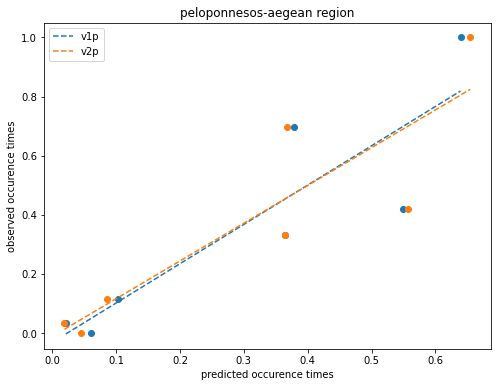

In [113]:
(fig, ax) = pyplot.subplots(figsize=(8, 6))

def func(x, a, b):
    return a * x + b

for i in range(0, 4, 2):

    x = y_pred[i].tolist()
    y = nnout[i].tolist()

    ax.scatter(x, y)

    # x = sorted(x, key=float)
    # y = sorted(y, key=float)

    popt, pcov = optimize.curve_fit(func, x, y)

    xf = numpy.linspace(min(x), max(x), 1000)
    yf = (popt[0] * xf) + popt[1]

    ax.plot(xf, yf, linestyle='--')

ax.set_title('peloponnesos-aegean region')
ax.set_xlabel('predicted occurence times')
ax.set_ylabel('observed occurence times')

ax.legend(('v1p', 'v2p'))

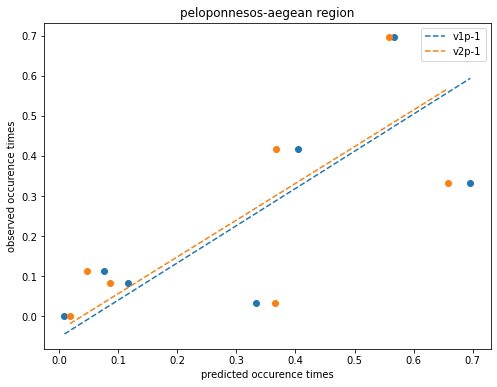

In [114]:
(fig, ax) = pyplot.subplots(figsize=(8, 6))

def func(x, a, b):
    return a * x + b

for i in range(1, 4, 2):

    x = y_pred[i].tolist()
    y = nnout[i].tolist()

    ax.scatter(x, y)

    # x = sorted(x, key=float)
    # y = sorted(y, key=float)

    popt, pcov = optimize.curve_fit(func, x, y)

    xf = numpy.linspace(min(x), max(x), 1000)
    yf = (popt[0] * xf) + popt[1]

    ax.plot(xf, yf, linestyle='--')

ax.set_title('peloponnesos-aegean region')
ax.set_xlabel('predicted occurence times')
ax.set_ylabel('observed occurence times')

ax.legend(('v1p-1', 'v2p-1'))

In [115]:
#TwoLayerNet.forward(ThreeLayerNet(D_in, H, D_out), nnpred)[0].tolist()
#ThreeLayerNet.forward(ThreeLayerNet(D_in, H, D_out), nnpred)[0].tolist()